# Equações diferenciais

Uma equação diferencial, de forma bastante abstrata, é dada por
$$ \begin{cases}
    y'(t)  & = F(t, y(t)) \\
    y(t_0) & = y_0.
\end{cases} $$
Uma solução é **uma função** $y(t)$ satisfazendo tanto a _condição inicial_ $y(t_0) = y_0$
quanto a _dinâmica_ $y'(t) = F(t, y(t))$.

Por questões práticas, também é comum dar um _intervalo de solução_, ou seja,
pedir que $y$ seja definida (pelo menos) num intervalo $[a,b]$ onde $t_0 \in [a,b]$.
Aqui, vamos usar $a = t_0$,
pensando "fisicamente" que a equação diferencial modela
a evolução de alguma quantidade $y$ que conhecemos agora ($t_0$)
e que queremos saber o quanto restará num momento futuro ($t_f = b$).

## Parte 1: O método de Euler

Continuando nesta linha, é razoável discretizar o problema da seguinte forma:

1. Definimos uma sequência de pontos $a = t_0 < t_1 < t_2 < \cdots < t_n = t_f = b$ no intervalo $[a,b]$.
2. Como $f$ é derivável, temos a aproximação $y(t_{i+1}) \sim y(t_i) + (t_{i+1} - t_i)y'(t_i)$.
3. A equação diferencial permide calcular $y'(t_i) = F(t_i, y(t_i))$.
4. Isso define (recursivamente) uma sequência de aproximações $y_i$ para $y(t_i)$ pela fórmula
$$ y_{i+1} = y_i + (t_{i+1} - t_i) F(t_i, y_i).$$

A sequência mais simples de ser usada é, claro, a de $n+1$ pontos igualmente espaçados no intervalo $[a,b]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Implemente o método de Euler

Escreva a função `euler` que divide o intervalo $[t_0, t_f]$ em `nsteps` intervalos de mesmo comprimento,
e retorna
- as `nsteps+1` extremidades `t_i`,
- as `nsteps+1` aproximações `y_i` de $y$ nestes pontos.

Dica: use `append` para construir os valores de `y_i`, mas retorne um `np.array()` para simplificar as contas.

In [2]:
def euler(F, t0, tf, y0, nsteps=100):
    ts,h = np.linspace(t0,tf,num=(nsteps+1),retstep=True)
    ys = [y0]
    for t in ts[:-1]:
        ys.append(ys[-1] + h*F(t,ys[-1]))
    
    return ts, np.array(ys)

Resolvendo uma EDO simples: $f' = f$.

In [3]:
def F1(t,y):
    return y
 
t_100, y_100 = euler(F1, 0, 1, 1)
assert len(t_100) == 101
assert t_100[0] == 0
assert t_100[-1] == 1

In [4]:
t_100, y_100 = euler(F1, 0, 1, 1)
assert len(y_100) == 101
assert y_100[0] == 1
assert( abs(y_100[-1] - 2.704813829421526) < 5e-15 )

O que é melhor é que o método de Euler permite resolver equações diferenciais bastante (arbitrariamente!) complicadas:

In [5]:
def F_dificil(t, y):
    return t*np.sin(y) - t**2*np.cos(y)
 
_, y_dificil = euler(F_dificil, 0, 2, 1, nsteps=100)
assert( abs(y_dificil[-1] - 3.553673725510754) < 5e-15 )

### 2. Qualidade da aproximação

Agora, faça um gráfico da solução numérica com mil pontos $f_{1000}$ para $f' = f$,
e da solução exata $f(t) = e^t$ no intervalo $[0,1]$.
Faça também um gráfico da diferença entre estas soluções.

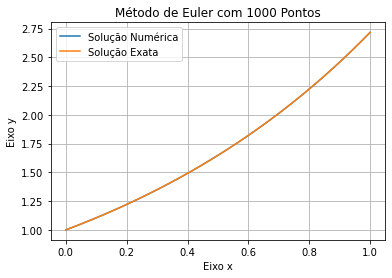

In [6]:
#Dados
t_mil, y_mil = euler(F1, 0, 1, 1,1000)
y_real = np.exp(t_mil)
#Plot
fig, ax = plt.subplots()
ax.plot(t_mil, y_mil, label="Solução Numérica")
ax.plot(t_mil, y_real, label="Solução Exata")
#Eixos
ax.set_title("Método de Euler com 1000 Pontos")
ax.set_xlabel("Eixo x")
ax.set_ylabel("Eixo y")
ax.legend()
ax.grid()
ax = plt.gca()
plt.show();

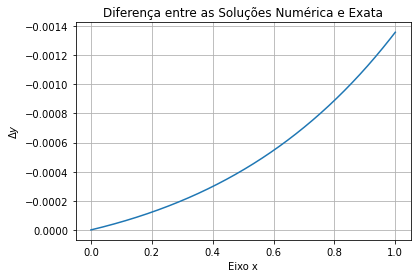

In [7]:
#Dados
Err = (y_mil - y_real)
#Plot
fig, ax = plt.subplots()
ax.plot(t_mil,Err)
#Eixos
ax.invert_yaxis()
ax.set_title("Diferença entre as Soluções Numérica e Exata")
ax.set_xlabel("Eixo x")
ax.set_ylabel("$\Delta y$")
ax.grid()

ax = plt.gca()
plt.show();

Faça o gráfico agora do erro **relativo**.

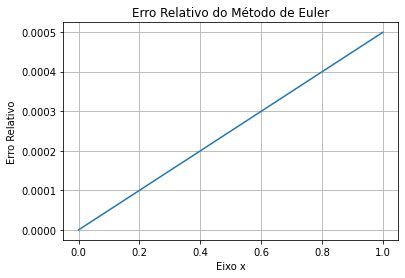

In [8]:
#Dados
Err_rel= np.abs((y_mil - y_real)/y_real)
#Plot
fig, ax = plt.subplots()
ax.plot(t_mil,Err_rel)
#Eixos
ax.set_title("Erro Relativo do Método de Euler")
ax.set_xlabel("Eixo x")
ax.set_ylabel("Erro Relativo")
ax.grid()

ax = plt.gca()
plt.show();

In [9]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

In [10]:
xdata = ax.lines[0].get_xdata()
assert min(xdata) == 0.0
assert max(xdata) == 1.0
 
ydata = ax.lines[0].get_ydata()
assert min(ydata) > -0.001
assert max(ydata) <  0.001

In [11]:
ax = None

### 3. Medindo erros

Suponha que conhecemos a solução exata da EDO, que chamaremos aqui de $g(t)$ para evitar confundir com $y_i$.
Mesmo que em muitos casos seja bastante razoável usar o "erro final" $g(t_n) - y_n$,
onde $g$ é a solução exata e $y_n$ a aproximação,
vamos nos concentrar no "erro total".
E, para ficar relativamente simples, vamos usar a **média dos valores absolutos das diferenças** entre $g(t_j)$ e $y_j$.
Usamos a média, e não a soma, porque ao variar o número de passos esta quantidade se mantém homogênea.

In [12]:
def erro(g, ys, ts):
    """ Calcula o erro entre os valores de ys e g(ts).  ys e ts  devem ser vetores numpy, e  g uma função. """
    return np.mean(np.abs(np.subtract(g(ts),ys)))

Como o erro total diminui ao aumentar o número de passos efetuados?
Faça um gráfico.

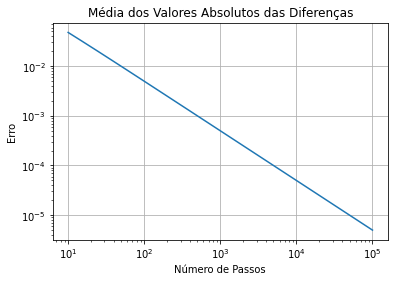

Wall time: 1.02 s


In [13]:
%%time
#Dados
ns = np.logspace(1,5,num=21, dtype=int)
Err = np.empty(ns.shape)
for i,ns_i in enumerate(ns):
    ts,ys= euler(F1, 0, 1, 1,ns_i)
    Err[i]= erro(np.exp,ys,ts)
#Plot
fig, ax = plt.subplots()
ax.loglog(ns,Err)
#Eixos
ax.set_title("Média dos Valores Absolutos das Diferenças")
ax.set_xlabel("Número de Passos")
ax.set_ylabel("Erro")
ax.grid();
ax = plt.gca()
plt.show()

In [14]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

ydata = ax.lines[0].get_ydata()
assert 1e-6 < min(ydata) < 1e-4
assert 1e-2 < max(ydata) < 1e-1

E comente o resultado.

Podemos ver que o erro é proporcional a $O(h)$ já que $h$ é inversamente proporcional ao número de passos, o que significa que um aumento em 10 vezes no número de subdivisões acarretará numa diminuição do erro da ordem de $10^{1}$

### 4. Sistemas de Equações

Se você usar funções "vetorizadas" para `F`,
o seu método de Euler é capaz de resolver (aproximar) até _sistemas_ de equações diferenciais.

Por exemplo, o sistema
$$ \begin{align}
v_0' & =  v_1 \\
v_1' & = -v_0
\end{align} $$
que é equivalente à equação diferencial trigonométrica básica $y'' = -y$,
pode ser simulado assim:

In [15]:
def F2(t, v):
    return np.array([v[1],-v[0]])

ans = np.array([-1.0505597866729235, -0.0010851561020816455])
ts, vs = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=100)

assert( all(abs(vs[-1]/ans - 1) < 1e-15) )

Dependendo de como você tenha implementado `euler()`, os valores de `vs` serão todos iguais,
pois você terá construído uma lista com `nsteps+1` vezes o mesmo `array`.
Para corrigir isso, modifique sua função `euler` para criar uma cópia de cada valor de $f_i$ antes de incluir na lista.

In [16]:
#não foi necessário modificação

Para usar as coordenadas da solução separadamente, ou seja, $f_1$ e $f_2$,
temos que transpor `v`.
(Note que os métodos constróem ao longo do tempo, e não por coordenadas)

In [17]:
ts, vs = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=100)
vs = np.transpose(vs)
vs[:,:10]

array([[ 1.        ,  1.        ,  0.99901304,  0.99703912,  0.99407921,
         0.99013527,  0.9852102 ,  0.97930792,  0.97243327,  0.96459208],
       [ 0.        , -0.03141593, -0.06283185, -0.09421677, -0.12553968,
        -0.1567696 , -0.18787562, -0.21882691, -0.24959277, -0.28014267]])

### 5. Mais gráficos

Observe que a sua solução numérica realmente está próxima da solução analítica,
fazendo um gráfico para a função e sua derivada,
tanto numéricas como analíticas.

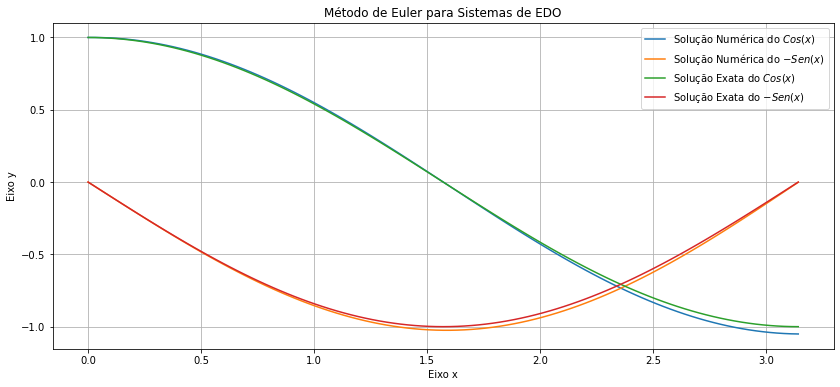

In [18]:
#Dados
ts, vs1 = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=100)
vs1 = np.transpose(vs1)
#Plot
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(ts, vs1[0,:], label="Solução Numérica do $Cos(x)$")
ax.plot(ts, vs1[1,:], label="Solução Numérica do $-Sen(x)$")
ax.plot(ts, np.cos(ts), label="Solução Exata do $Cos(x)$")
ax.plot(ts, -np.sin(ts), label="Solução Exata do $-Sen(x)$")
#Eixos
ax.set_xlabel("Eixo x")
ax.set_ylabel("Eixo y")
ax.set_title("Método de Euler para Sistemas de EDO")
ax.grid()
ax.legend()
ax = plt.gca()
plt.show()

In [19]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 4
assert len(ax.legend().texts) == 4

In [20]:
xdata = ax.lines[0].get_xdata()
assert min(xdata) == 0.0
assert max(xdata) == np.pi

ydata = [l.get_ydata() for l in ax.lines]
assert -1.1 < np.min(ydata) < -1.0
assert np.max(ydata) == 1.0

In [21]:
ax = None

Agora, aumente o intervalo de integração para $6\pi$, e use 600 passos.

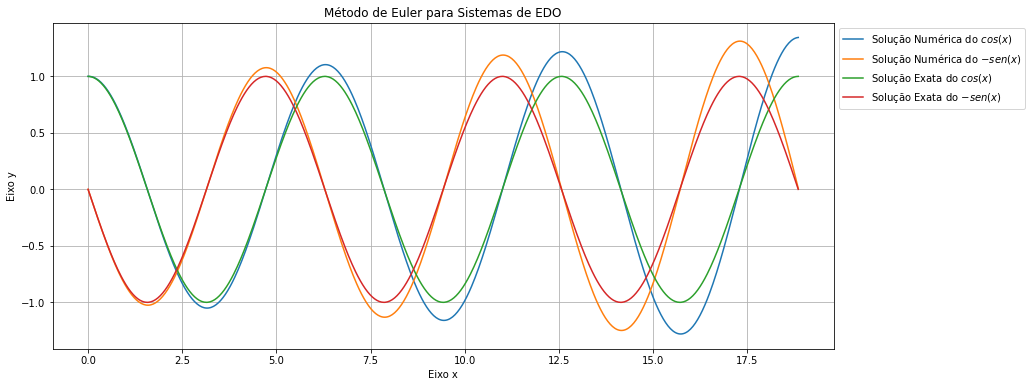

In [22]:
#Dados
ts, vs1 = euler(F2, 0, 6*np.pi, np.array([1.0,0.0]), nsteps=600)
vs1 = np.transpose(vs1)
#Plot
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(ts, vs1[0,:], label="Solução Numérica do $cos(x)$")
ax.plot(ts, vs1[1,:], label="Solução Numérica do $-sen(x)$")
ax.plot(ts, np.cos(ts), label="Solução Exata do $cos(x)$")
ax.plot(ts, -np.sin(ts), label="Solução Exata do $-sen(x)$")
#Eixos
ax.set_xlabel("Eixo x")
ax.set_ylabel("Eixo y")
ax.set_title("Método de Euler para Sistemas de EDO")
ax.grid()
ax.legend(loc="upper left", bbox_to_anchor=(1.0,1.0))
ax = plt.gca()
plt.show()

O que aconteceu?

Podemos ver que conforme vamos progredindo para dentro do intervalo em direção ao outro extremo, a solução numérica vai acumulando erros pois o método utiliza valores préviamente calculados, que contem erro, para encontrar os próximos valores o que vai desviando cada vez mais a solução numérica da exata ao se progredir no intervalo, mesmo que em certos valores a função convirja para a solução exata. Isso é perceptível com o aumento dos picos e vales conforme a função chega próximo de $6\pi$.

### 6. Erros multidimensionais

Voltemos ao intervalo $[0, \pi]$.
Como se comporta o erro no caso do sistema acima, conforme o número de pontos aumenta?
Qual erro é mais importante: o da derivada ($f_2$) ou o da função original ($f_1$)?
Você vê uma razão para isso?

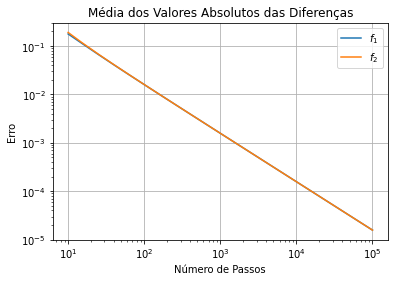

Wall time: 3.5 s


In [23]:
%%time
#Dados

fig, ax = plt.subplots()
ns = np.logspace(1,5,num=21, dtype=int)
Err_f1 = np.empty(ns.shape)
Err_f2 = np.empty(ns.shape)
for i,ns_i in enumerate(ns):
    ts,vs= euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=ns_i)
    vs = np.transpose(vs)
    Err_f1[i]= erro(np.cos,vs[0,:],ts)
    Err_f2[i]= erro(lambda x: -np.sin(x),vs[1,:],ts)
#Plot
ax.loglog(ns,Err_f1,label="$f_{1}$")
ax.loglog(ns,Err_f2,label="$f_{2}$")
#Eixos
ax.set_title("Média dos Valores Absolutos das Diferenças")
ax.set_xlabel("Número de Passos")
ax.set_ylabel("Erro")
ax.grid()
ax.legend()

ax = plt.gca()
plt.show();

In [24]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [25]:
xdata = ax.lines[0].get_xdata()
assert min(xdata) == 1e1
assert max(xdata) == 1e5

ydata = [l.get_ydata() for l in ax.lines]
assert 1e-5 < np.min(ydata) < 5e-5
assert 1e-1 < np.max(ydata) < 5e-1

Comente abaixo

Os dois erros se comportam de forma semelhante, da ordem $O(h)$ como esperado por utilizar o Método de Euler, e como este Método, para achar os valores da função original($f_{1}$) precisa calcular os valores da derivada($f_{2}$) nos pontos dentro do intervalo, então nesse sentido os erros das derivadas são mais importantes.

O erro certamente depende do intervalo "de integração" da equação diferencial.
Será que a importância relativa também depende? Faça o gráfico do erro para o intervalo $[0, \pi/2]$ e conclua.

Wall time: 2.57 s


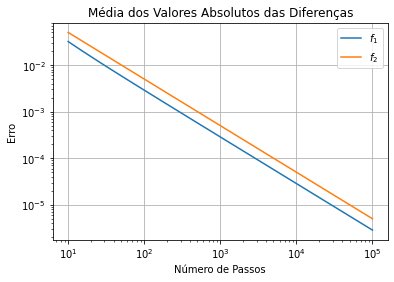

In [26]:
%%time
#Dados
ns = np.logspace(1,5,num=21, dtype=int)
Err_f1 = np.empty(ns.shape)
Err_f2 = np.empty(ns.shape)
for i,ns_i in enumerate(ns):
    ts,vs= euler(F2, 0, np.pi/2 , np.array([1.0,0.0]), nsteps=ns_i)
    vs = np.transpose(vs)
    Err_f1[i]= erro(np.cos,vs[0,:],ts)
    Err_f2[i]= erro(lambda x: -np.sin(x),vs[1,:],ts)
#Plot
fig, ax = plt.subplots()
ax.loglog(ns,Err_f1,label="$f_{1}$")
ax.loglog(ns,Err_f2,label="$f_{2}$")
#Eixos
ax.set_title("Média dos Valores Absolutos das Diferenças")
ax.set_xlabel("Número de Passos")
ax.set_ylabel("Erro")
ax.legend()
ax.grid();

Comente

Podemos ver que sim,já que a posição relativa do erro da derivada($f_{2}$) e da função original($f_{1}$) diferem entre sí para os intervalos $[0,\pi]$, $[0,\frac{\pi}{2}]$ sendo assim o quanto o o erro de uma depende da outra varia porem a importância ainda é maior para o erro da derivada($f_{2}$). 

## Parte 2: Métodos de maior ordem para EDOs

### Equações diferenciais e Integrais

Calcular a integral $\int_a^b h(t) \, dt$ é a mesma coisa que resolver a equação diferencial
$$ \begin{cases}
  y'(t) & = h(t) \\
  f(a)  & = 0,
\end{cases} $$
pelo Teorema Fundamental do Cálculo.
Portanto, é possível implementar uma função `int_rect` usando a função `euler`.

Isso é verdade para vários métodos de integração: muitas vezes existe um método de Equações Diferenciais cujo caso particular é um método de integração quando a ED é "trivial"
(ou seja, quando a fórmula $F$ para $y'(t)$ não depende de $y(t)$).

### O método do Trapézio para EDOs: uma equação implícita

Inversamente, podemos usar métodos de integração e "generalizar" para usar em EDOs.
Por exemplo, podemos usar a aproximação do trapézio:
$$ y(h) = y(0) + \int_0^h y'(t) \, dt \sim h \cdot \frac{y'(0) + y'(h)}{2}.$$

Substituindo a EDO $f'(t) = F(t, f(t))$, isto dá uma equação **implícita** para calcular $y(h)$.

### Trapézio 1: Equação implícita

Escreva a equação implícita que a aproximação $y_1$ de $y(h)$ satisfaz, em função de $y_0$, $h$, $F$, $\ldots$.

$$ y_1 = y (0) + h \cdot \frac{F\big(0,y (0) \big)+ F\big(h,y_1\big)}{2} $$

### Trapézio 2: resolvendo a equação implícita de 1 passo

Escreva uma função que dá o passo do método do trapézio.

Obs: O método da secante precisa de dois pontos para iniciar.
Que valor de $y$ deve estar próximo à solução?
Se você tiver que "chutar" outro valor, este provavelmente estará mais próximo ou mais distante?
Qual deles você deve usar como primeiro e qual como segundo valor na secante?

In [27]:
def secante(f, y0, y1, prec=1e-15, maxsteps=100):
    """Resolve a raiz de uma função pelo método da secante, retornando os passos. Os inputs são a função, 
    dois pontos em x, o ponto inicial y, a precisão em x, a precisão em y e o número máximo de iterações """
    
    for iteracao in range(1,maxsteps+1):
        f0 = f(y0)
        f1 = f(y1)
        yn = y0 - (f0*((y0-y1)/(f0-f1)))
        if abs(yn-y1)< prec:
            return yn
        y0 = y1
        y1 = yn
        
    return yn

O valor de $y_{1}$ deve estar mais próximo da solução pois no método da secante ele será usado 2 vezes (para a primeira e segunda iteração) sendo assim o "chute" é usado como primeiro valor da secante e é escolhido o chute o mais próximo possivel de $y$ e dessa forma o chute $(y+h)$ é o ideal pois fica cada vez melhor com menores valores de $h$

In [28]:
def trapezoidal_step_sec(F, tcurr, ycurr, h):
    """Resolve a equação implícita do método trapezoidal pelo método da secante, partindo de (tcurr,ycurr),
    retornando uma aproximação de  y  em  tcurr+h."""
    tnext = tcurr+h
    def f_aux(y1, y0 = ycurr, t0 = tcurr, t1 = tnext, pas = h, f = F):
        return y0 + (h/2)*((f(t0,y0)+f(t0+h,y1))) - y1
            
    ys = secante(f_aux, ycurr+h, ycurr)
    
    return ys


### Alguns testes simples

In [29]:
def G(t,y):
    return t - np.cos(y)

ynext = trapezoidal_step_sec(G, 0, 1, 0.1)
assert abs(ynext - 0.9488541465905801) < 1e-14

In [30]:
ynext = trapezoidal_step_sec(G, 0, 1, 0.3)
assert abs(ynext - 0.8668725901552984) < 1e-14

### Trapézio 3: Resolvendo a EDO

Agora, incorporamos o passo do trapézio numa função `trapezoidal_ode`, análoga à `euler`,
que resolve a EDO $y' = F(t, y(t))$ pelo método do trapézio.

In [31]:
def trapezoidal_ode(F, t0, tf, y0, nsteps=100):
    """Calcula uma solução aproximada da equação  y' = F(t,y)  pelo método do trapézio,
    dividindo o intervalo  [t0, tf]  em  nsteps  passos,
    e usando o método da secante para resolver a equação implícita."""
    ts,h=np.linspace(t0,tf,nsteps+1,retstep=True)
    ys = [y0]
    for t in ts[:-1]:
        ys.append(trapezoidal_step_sec(F, t, ys[-1], h))
        
    return ts, np.array(ys)

In [32]:
def F1(t,y):
    return y

t_100, y_100 = trapezoidal_ode(F1, 0, 1, 1)
assert len(t_100) == 101
assert t_100[0] == 0
assert t_100[-1] == 1

In [33]:
t_100, y_100 = trapezoidal_ode(F1, 0, 1, 1)
assert len(y_100) == 101
assert y_100[0] == 1
assert( abs(y_100[-1] - 2.7183044812417965) < 5e-15 )

In [34]:
def F_dificil(t, y):
    return t*np.sin(y) - t**2*np.cos(y)

_, y_dificil = trapezoidal_ode(F_dificil, 0, 2, 1, nsteps=100)
assert( abs(y_dificil[-1] - 3.587544094834753) < 5e-15 )

In [35]:
t_100, y_100 = trapezoidal_ode(F1, 0, 1, 1)
assert np.allclose(y_100, np.exp(t_100))
assert 1e-5 < np.max(y_100 - np.exp(t_100)) < 5e-5

t_1000, y_1000 = trapezoidal_ode(F1, 0, 1, 1, nsteps=1000)
assert np.allclose(y_1000, np.exp(t_1000), rtol=1e-7)
assert 1e-7 < np.max(y_1000 - np.exp(t_1000)) < 5e-7

O que a caixa acima está testando?

Nos asserts acima está se testando se o maior valor dentre todos os resultantes da subtração dos valores numéricos e os valores exatos no intervalo para a função, ou seja, se o erro de implementação do método numérico, está dentro do intervalo estipulado, neste caso o intervalo $[1\times10^{-7}, 5 \times 10^{-7}]$

### O método do ponto médio para integrais

Esse é um método de "duplo cálculo", e explícito:

- Andamos metade do tempo $h$, usando um passo "de Euler"
- Recalculamos o passo de Euler, mas usamos a derivada "no meio do caminho",
  que é uma aproximação melhor (porque simétrica).

Em fórmulas:
- Passo explícito, $m_i = y_i + F(t_i, y_i) \cdot h/2$
- 2º passo explícito: $y_{i+1} = y_i + F(t_i + h/2, m_i) \cdot h$

### Ponto médio 1:

Escreva uma função que dá o novo ponto usando a regra do ponto médio

In [36]:
def midpoint_step(F, t, y, h):
    m=y+F(t,y)*h/2
    return y+F(t+h/2,m)*h

In [37]:
def G(t,y):
    return t - np.cos(y)
 
ynext = midpoint_step(G, 0, 1, 0.1)
assert abs(ynext - 0.9487165172210511) < 1e-14

In [38]:
ynext = midpoint_step(G, 0, 1, 0.3)
assert abs(ynext - 0.8630045486909678) < 1e-14

### Ponto médio 2: EDO

E agora, incorpore este passo num método de resolução de EDOs

In [39]:
def midpoint_ode(F, t0, tf, y0, nsteps=100):
    """Calcula uma solução aproximada da equação y' = F(t,y) no intervalo  [t0, tf]  usando  nsteps  passos,
    usando o passo explícito no ponto médio."""
    ts,h=np.linspace(t0,tf,nsteps+1,retstep=True)
    ys=[y0]
    for t in ts[:-1]:
        ys.append(midpoint_step(F,t,ys[-1],h))
    return ts, np.array(ys)

In [40]:
def F1(t,y):
    return y
 
t_100, y_100 = midpoint_ode(F1, 0, 1, 1)
assert len(t_100) == 101
assert t_100[0] == 0
assert t_100[-1] == 1

In [41]:
t_100, y_100 = midpoint_ode(F1, 0, 1, 1)
assert len(y_100) == 101
assert y_100[0] == 1
assert( abs(y_100[-1] - 2.718236862559957) < 5e-15 )

In [42]:
def F_dificil(t, y):
    return t*np.sin(y) - t**2*np.cos(y)
 
_, y_dificil = midpoint_ode(F_dificil, 0, 2, 1, nsteps=100)
assert( abs(y_dificil[-1] - 3.5874427140529868) < 5e-15 )

In [43]:
t_100, y_100 = midpoint_ode(F1, 0, 1, 1)
assert np.allclose(y_100, np.exp(t_100), rtol=2e-5)
assert 2e-5 < np.max(abs(y_100 - np.exp(t_100))) < 10e-5
 
t_1000, y_1000 = midpoint_ode(F1, 0, 1, 1, nsteps=1000)
assert np.allclose(y_1000, np.exp(t_1000), rtol=2e-7)
assert 2e-7 < np.max(abs(y_1000 - np.exp(t_1000))) < 10e-7

### Gráficos

### Gráficos 1: Solução de EDOs

Resolva a EDO

$$y' = t - \cos(y)$$

com condição inicial $y(0) = 1$ no intervalo $[0,5]$, usando 30 pontos,
pelos 3 métodos (Euler, Trapézio, ponto médio).
Faça o gráfico das três soluções.
Não esqueça do título e da legenda!

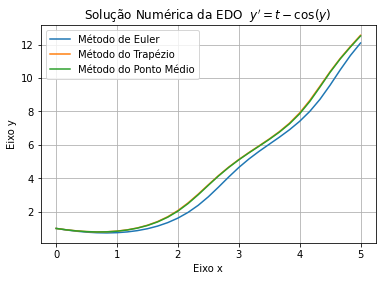

In [44]:
#Função da EDO
def F_trig(t,y):return t-np.cos(y)
#Dados 
t_euler, y_euler= euler(F_trig, 0, 5, 1, nsteps=30)
t_traps, y_traps= trapezoidal_ode(F_trig, 0, 5, 1, nsteps=30)
t_pm, y_pm = midpoint_ode(F_trig, 0, 5, 1, nsteps=30)
#Plot
fig, ax = plt.subplots()
ax.plot(t_euler, y_euler, label="Método de Euler")
ax.plot(t_traps, y_traps, label="Método do Trapézio")
ax.plot(t_pm, y_pm, label="Método do Ponto Médio")
#Eixos
ax.set_xlabel("Eixo x")
ax.set_ylabel("Eixo y")
ax.set_title("Solução Numérica da EDO  $y'=t-\cos(y)$ ")
ax.grid()
ax.legend()
 
ax = plt.gca()
plt.show();

In [45]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

In [46]:
ax = None

Esta EDO não tem "solução analítica simples".
Como você faria para saber qual das curvas está "mais correta"?
Explique sua ideia abaixo, e faça contas / gráficos na caixa seguinte

Podemos escolher uma EDO que tenha uma solução analítica conhecida e analizar qual método tem uma perfomace melhor para o mesmo numero de passos e o mesmo intervalo e tomar, por exemplo, o erro relativo como parâmetro para essa performace e saber qual dos métodos estaria "mais correto" a partir dele.

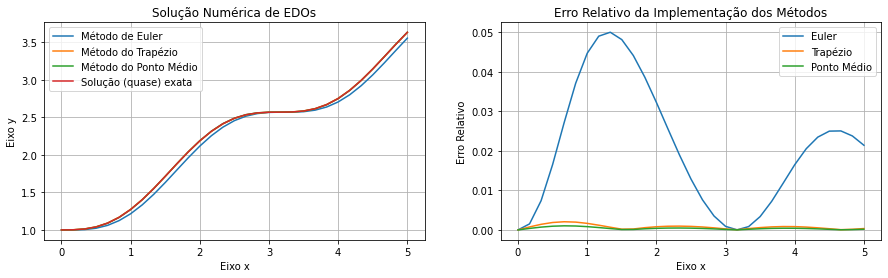

In [47]:
# Contas / gráfico

def F_teste(t,y):return np.sin(t)**2
#Dados
t_euler, y_euler= euler(F_teste, 0, 5, 1, nsteps=30)
t_traps, y_traps= trapezoidal_ode(F_teste, 0, 5, 1, nsteps=30)
t_pm, y_pm = midpoint_ode(F_teste, 0, 5, 1, nsteps=30)
y_exato = (t_pm - np.sin(t_pm)*np.cos(t_pm)+2)/2

#Plot1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.plot(t_euler,y_euler, label="Método de Euler")
ax1.plot(t_traps,y_traps, label="Método do Trapézio")
ax1.plot(t_pm,y_pm, label="Método do Ponto Médio")
ax1.plot(t_traps,y_exato, label="Solução (quase) exata")
#Eixos1
ax1.set_xlabel("Eixo x")
ax1.set_ylabel("Eixo y")
ax1.set_title("Solução Numérica de EDOs")
ax1.grid()
ax1.legend()


#Plot2
ax2.plot(t_euler, np.abs((y_euler-y_exato)/y_exato), label="Euler")
ax2.plot(t_traps, np.abs((y_traps-y_exato)/y_exato), label="Trapézio")
ax2.plot(t_pm, np.abs((y_pm-y_exato)/y_exato), label="Ponto Médio")
#Eixos2
ax2.set_xlabel("Eixo x")
ax2.set_ylabel("Erro Relativo")
ax2.set_title("Erro Relativo da Implementação dos Métodos")
ax2.grid()
ax2.legend();

### Gráficos 2: Velocidade de convergência

In [48]:
methods_3 = [euler, trapezoidal_ode, midpoint_ode]

Faça uma função que desenha o gráfico dos erros de solução de uma EDO, dados
- a função $F$ da EDO
- o intervalo $[a,b]$
- a condição inicial $y_0$
- a solução analítica `ysol`
- o número de pontos $n$


In [49]:
def graph_err(F, a,b, y0, ysol, n, methods=methods_3):
    fig, ax = plt.subplots()
    for m in methods:
        t,y= m(F,a,b,y0,n)
        ax.plot(t,(y-ysol(t)),label=f"{m.__name__}")
    ax.set_xlabel("Número de Passos")
    ax.set_ylabel("Erro")
    ax.set_title("Gráficos dos Erros da Solução Numérica de EDOs")
    ax.legend(title="Método",loc="upper left", bbox_to_anchor=(1.0,1.0))

Uma EDO conhecida, para comparar o erro: $$y' = -y.$$

<ipython-input-50-6966e364aca3>:5: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  plt.yscale('symlog', linthresh=1e-4) # Com "symlog", não use valores absolutos


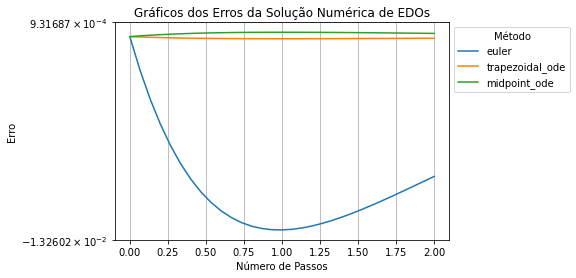

In [50]:
def G2(t,y): return -y
def ysol2(t): return np.exp(-t)
 
graph_err(G2, 0,2, 1, ysol2, 30)
plt.yscale('symlog', linthresh=1e-4) # Com "symlog", não use valores absolutos
plt.grid()
ax = plt.gca()

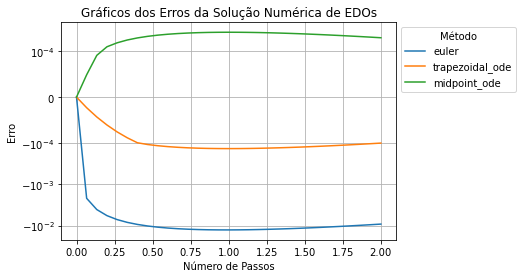

In [51]:
def G2(t,y): return -y
def ysol2(t): return np.exp(-t)
 
graph_err(G2, 0,2, 1, ysol2, 30)
plt.yscale('symlog', linthreshy=1e-4) # Com "symlog", não use valores absolutos
plt.grid()
ax = plt.gca()

In [52]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

In [53]:
xdata = ax.lines[0].get_xdata()
assert min(xdata) == 0.0
assert max(xdata) == 2.0
 
ydata = [l.get_ydata() for l in ax.lines]
assert -2e-2 < np.min(ydata) < -1e-2
assert  1e-4 < np.max(ydata) <  4e-4

### Gráficos 3: Erro em função de $n$

Usando a função `erro` definida anteriormente, faça o gráfico do erro, para os 3 métodos,
em função de $n$, para a EDO $y' = y$, no intervalo $[0,2]$.

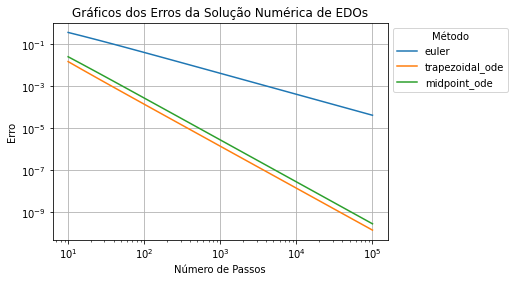

Wall time: 5.96 s


In [54]:
%%time
ns = np.logspace(1,5,num=21, dtype=int) 
fig, ax = plt.subplots()
for m in methods_3:
    Err = []
    for ns_i in ns:
        ts,ys= m(F1, 0, 2, 1,ns_i)
        Err.append(erro(np.exp,ys,ts))
    ax.loglog(ns,Err,label=f"{m.__name__}")
 

    
#Eixos    
ax.set_xlabel("Número de Passos")
ax.set_ylabel("Erro")
ax.set_title("Gráficos dos Erros da Solução Numérica de EDOs")
ax.legend(title="Método",loc="upper left", bbox_to_anchor=(1.0,1.0))
ax.grid();    

ax = plt.gca()
plt.show()

In [55]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

O que você observa?

Podemos observar que o Método do Trapézio e o Método do Ponto Médio tem ordem de convergência $O(h^{2})$ enquanto o Método de Euler tem somente convergência $O(h)$. Porém mesmo tendo ordem de convergência iguáis o Método do Trapézio tem erros menores do que o do Método do Ponto Médio.